In [1]:
import pandas as pd

In [2]:
csv_data = pd.read_csv("data.csv")
df = pd.DataFrame(csv_data)
df.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


# 1.
## a. Visualize the data using a scatter plot

In [3]:
import matplotlib.pyplot as plt

x = df.V1
y = df.V2

plt.scatter(x, y)
plt.title('kMeans Initial Data Visualization')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

<Figure size 640x480 with 1 Axes>

## b. Determine the appropriate value of k
k = 3

# 2. Create multiple kMeans models from sklearn library using the values of k from 1 - 10

In [4]:
import numpy as np
from sklearn.cluster import KMeans

def kModel(clusters):
    kmeans = KMeans(n_clusters = clusters)
    return kmeans.fit(df)

kModels = {}

for i in range(1, 10):
    kModels[i] = kModel(i)

kModels

{1: KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 2: KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 3: KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 4: KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 5: KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 6: KMeans(algorithm='auto', c

# 3. Sum of squares for each value of k

In [5]:
sse = {}
for k in kModels:
    sse[k] = kModels[k].inertia_
sse

{1: 5030433.09612008,
 2: 2309985.389168787,
 3: 611605.8806933891,
 4: 535555.4564582917,
 5: 470160.6404281605,
 6: 407801.2849938381,
 7: 358403.368206079,
 8: 311661.3345555068,
 9: 271606.93161325285}

# 4. Most suitable value for k

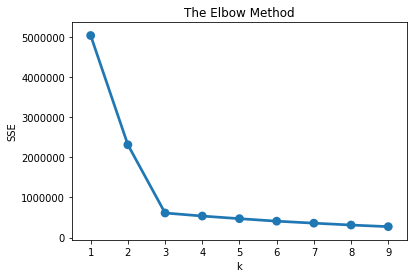

In [6]:
import seaborn as sns
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x = list(sse.keys()), y = list(sse.values()))
plt.show()

### Thus, the best value of k is 3

# 5. Final kMeans model

In [7]:
kMeansModel = kModel(3)

# 6. Visualize clusters

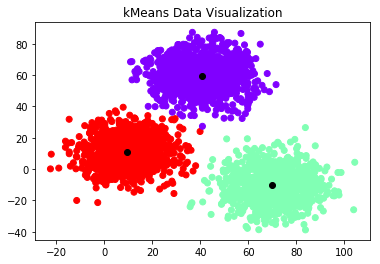

In [8]:
x = df.V1
y = df.V2

plt.scatter(x, y, c=kMeansModel.labels_, cmap='rainbow')
plt.scatter(kMeansModel.cluster_centers_[:,0] ,kMeansModel.cluster_centers_[:,1], color='black') 
plt.title('kMeans Data Visualization')
plt.show()